In [2]:
from igraph import *
import numpy as np
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas as pd

#### TASK 1

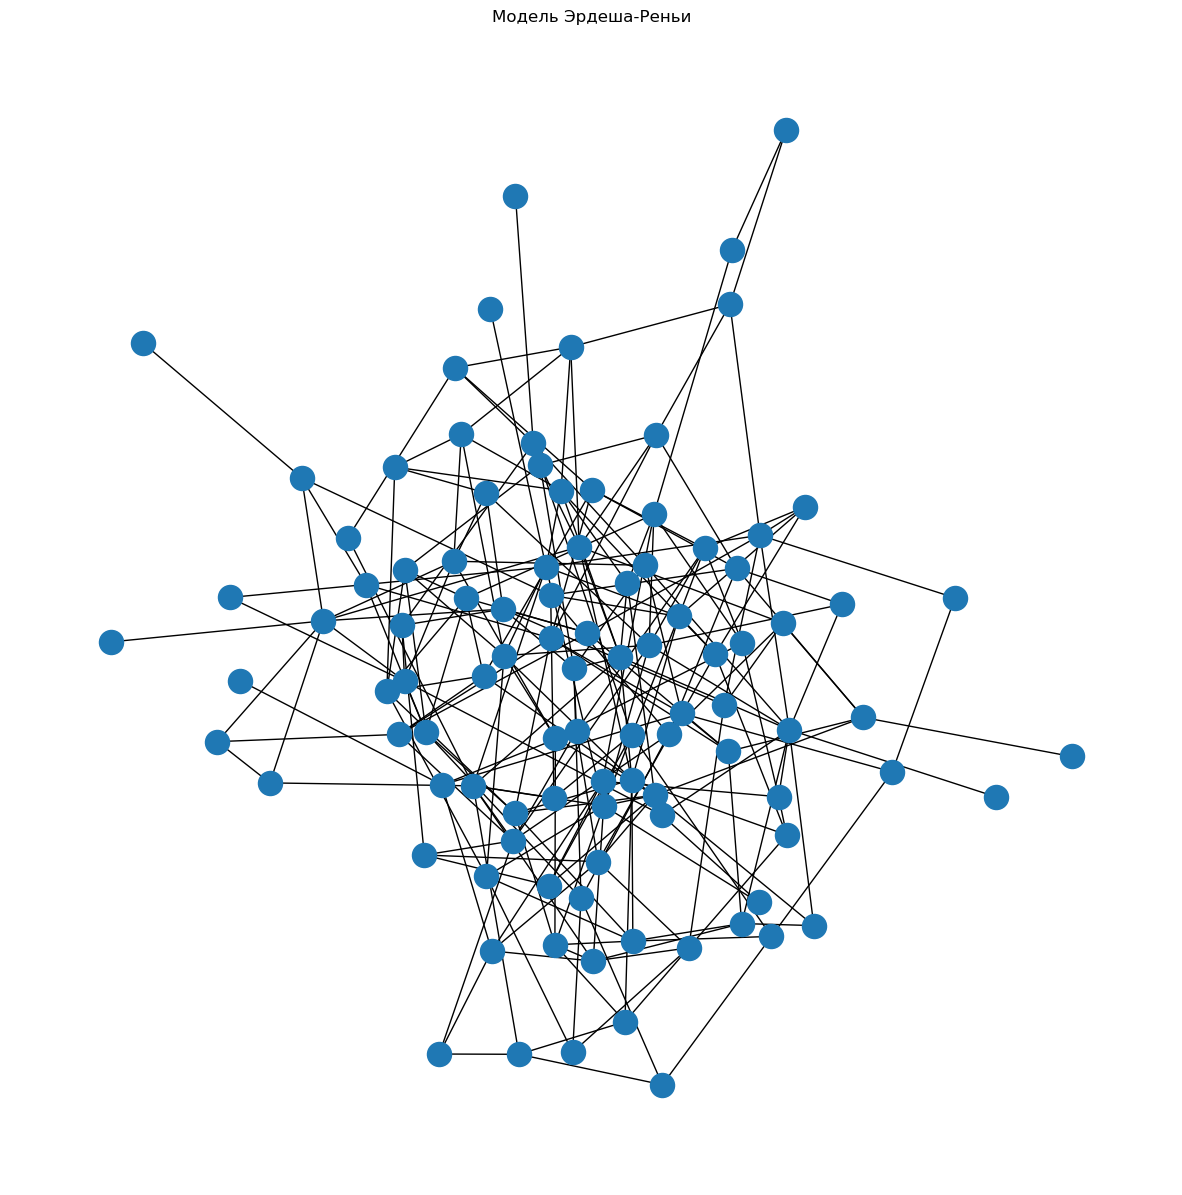

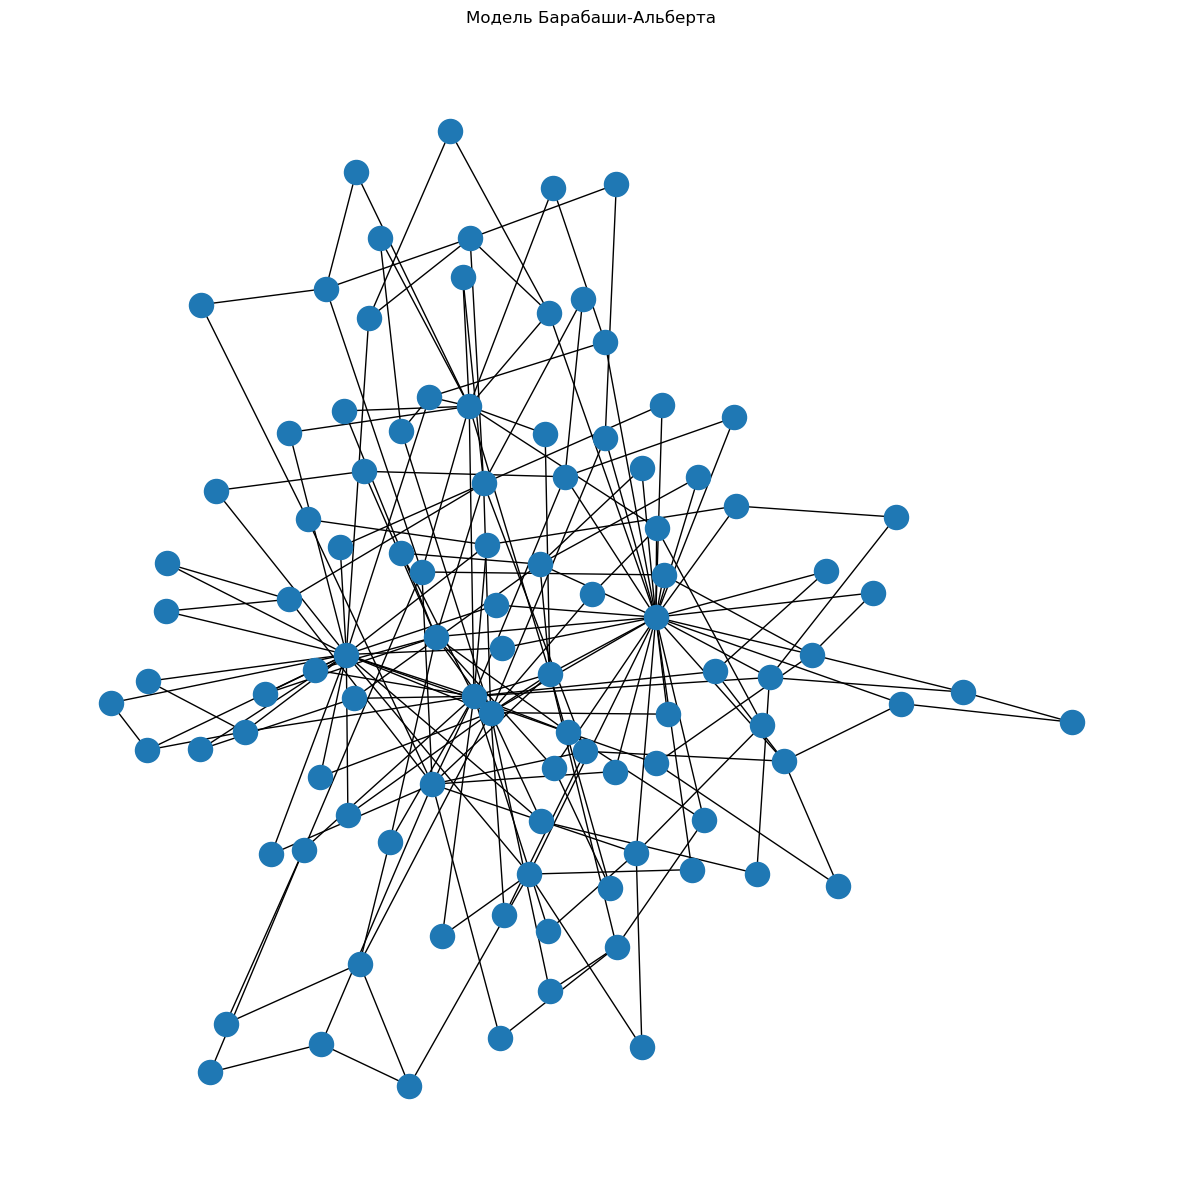

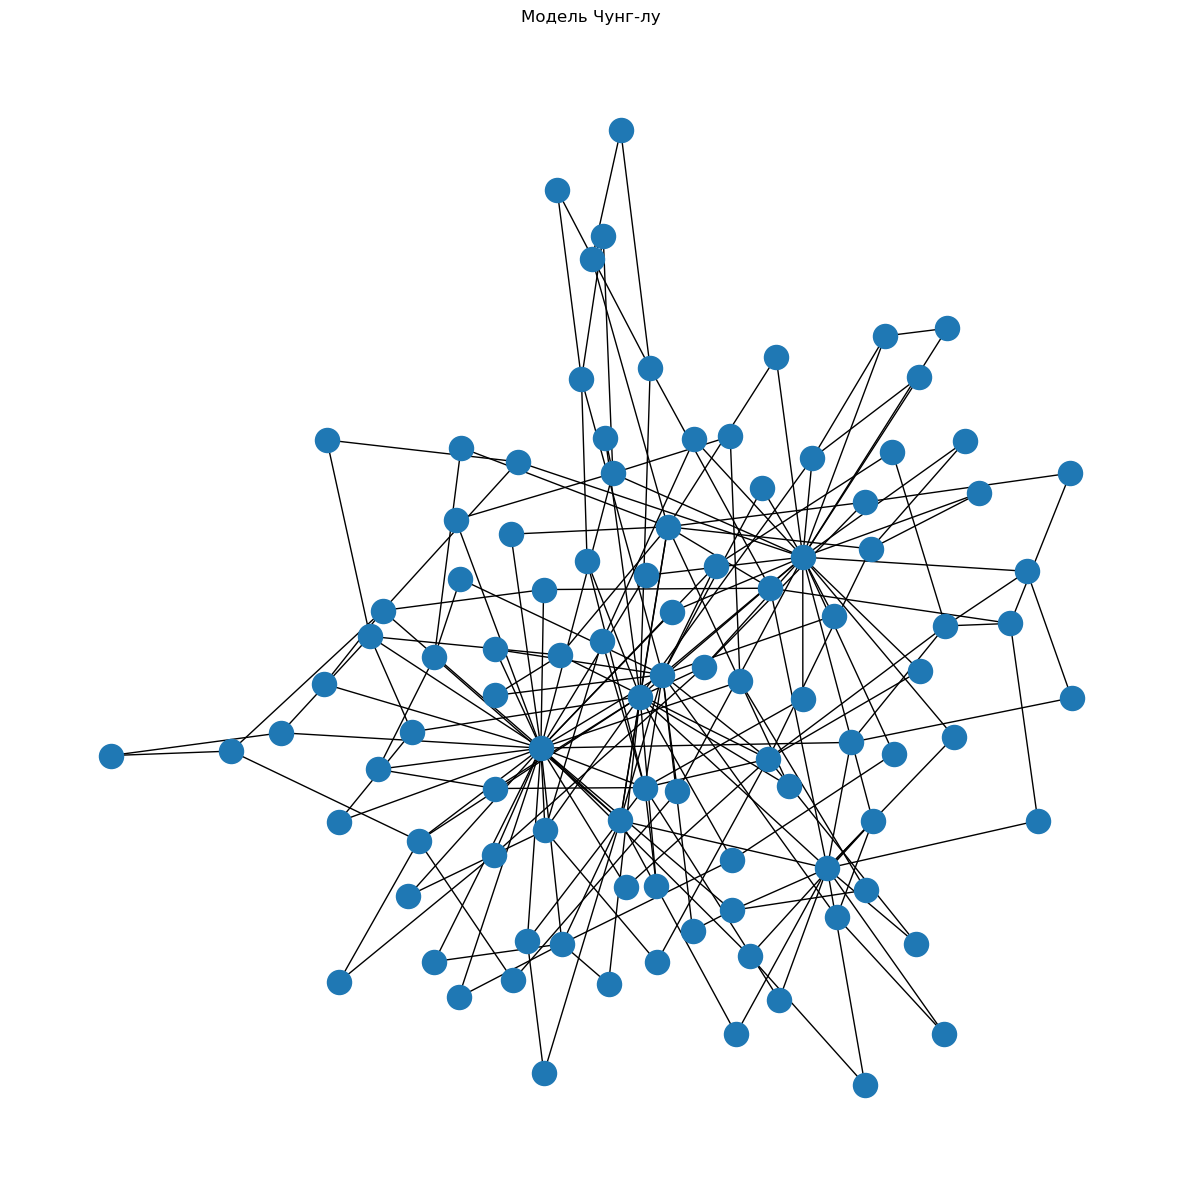

In [18]:
# generate random graphs using erdos-renyi, barabasi-albert, chung-lu models

N_nodes = 100
seed = np.random.randint(0, 9999)
er_random_nx_G = nx.erdos_renyi_graph(N_nodes, 5/N_nodes, seed=11)
plt.figure(figsize=(15,15))
plt.title('Модель Эрдеша-Реньи')
nx.draw(random_nx_G, )

ba_random_nx_G = nx.barabasi_albert_graph(N_nodes, int(N_nodes/50), seed=11)
plt.figure(figsize=(15,15))
plt.title('Модель Барабаши-Альберта')
nx.draw(ba_random_nx_G, )

cl_random_nx_G = nx.expected_degree_graph([i for i in range(N_nodes)], seed=11)
plt.figure(figsize=(15,15))
plt.title('Модель Чунг-лу')
nx.draw(ba_random_nx_G, )

#### TASK 2

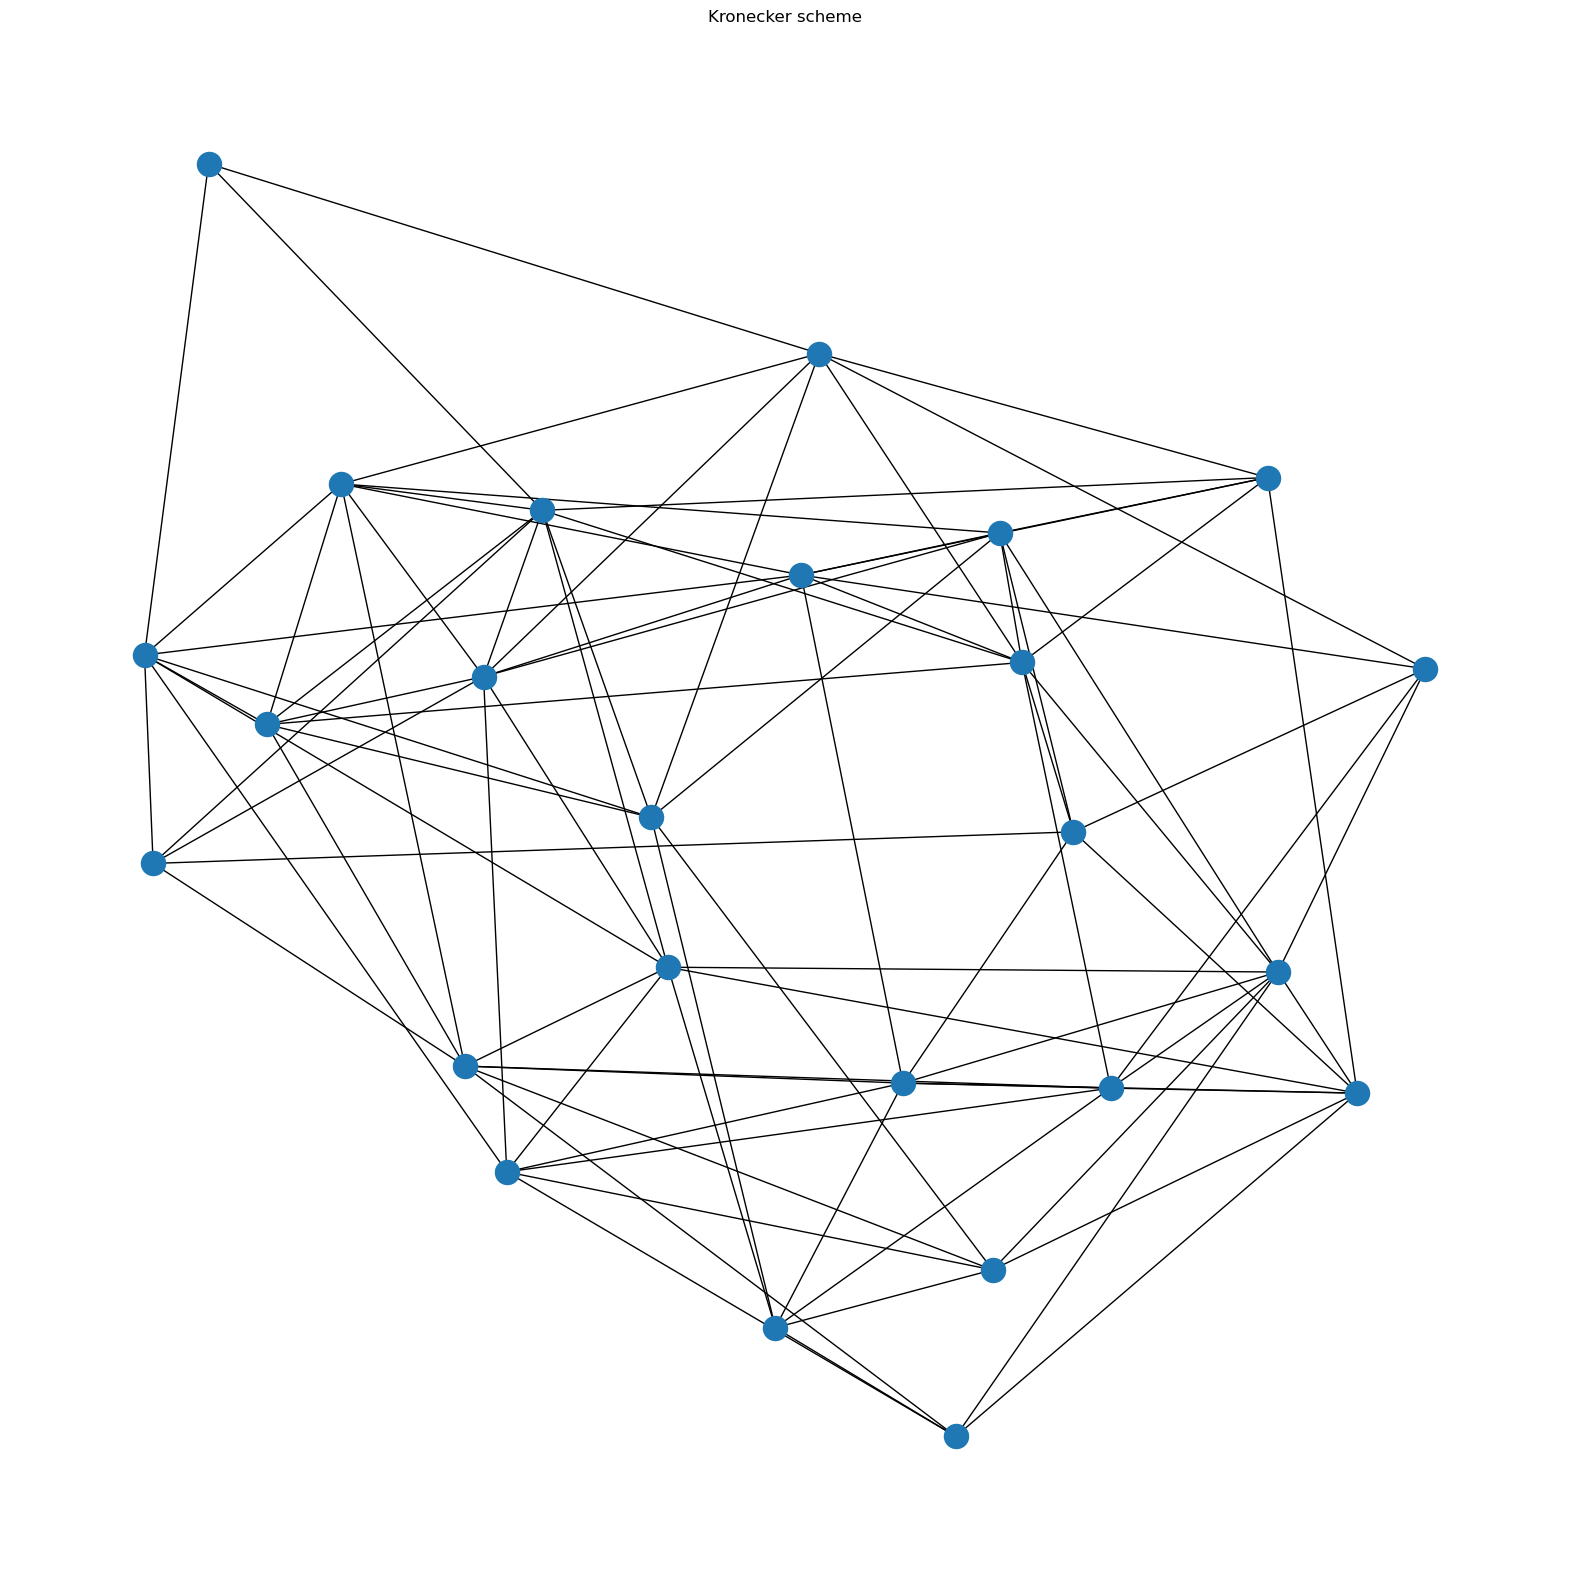

In [193]:
# generate random graphs using Kronecker model
# stochastic graph
random_A = np.random.uniform(0, 4, size=(5,5))
N_degree = 2
kronecker_matrix = random_A.copy()
for _ in range(N_degree - 1):
    kronecker_matrix = np.kron(kronecker_matrix, random_A)

kron_adjacency = (np.random.uniform(size=kronecker_matrix.shape) > kronecker_matrix).astype(int)

kronecker_G = nx.Graph(kron_adjacency)
plt.figure(figsize=(20,20))
plt.title('Kronecker scheme')
nx.draw(kronecker_G)
plt.show()

#### TASK 3

In [ ]:
# generate random graph: nodes > 1000, edges > 2000
# construct cdfs for degrees, average path len, clusterization coef

N_nodes = 1001
random_G = nx.random_graphs.erdos_renyi_graph(n=N_nodes, p=0.01)

print(f'Nodes in : {len(random_G.nodes)}, edges in : {len(random_G.edges)}')

plt.figure(figsize=(100, 100))
plt.title('Random graph')
nx.draw(random_G)
plt.show()

Average shortest path length = 3.26462
Coefficient of clusterization = 0.00773


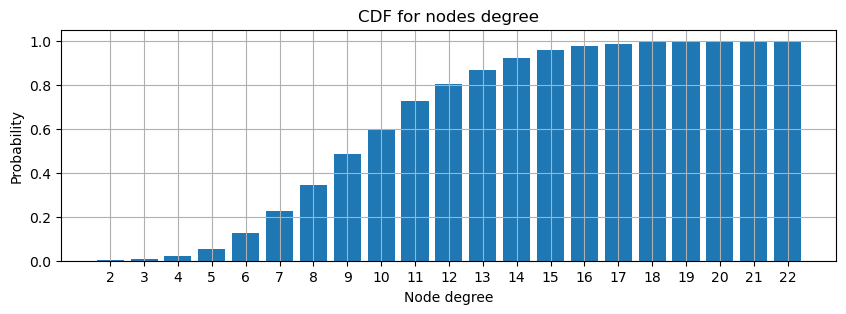

In [4]:
G_degree = pd.DataFrame(random_G.degree)
G_degree.columns = ['Node', 'Degree']

print(f'Average shortest path length = {nx.average_shortest_path_length(random_G):.5f}')
print(f'Coefficient of clusterization = {nx.average_clustering(random_G):.5f}')

plt.figure(figsize=(10,3))
_ = plt.bar(x=np.arange(G_degree['Degree'].min(), G_degree['Degree'].max()), height=(G_degree.groupby(by='Degree').count().cumsum() / G_degree.shape[0]).values.flatten())
_ = plt.xticks(np.arange(G_degree['Degree'].min(), G_degree['Degree'].max()))
plt.title('CDF for nodes degree')
plt.xlabel('Node degree')
plt.ylabel('Probability')
plt.grid()

In [93]:
# implementation of some samplers ...
def random_walk(graph: nx.Graph, share: float = 0.5, criterion: str = 'n'):
    subgraph = nx.Graph()
    
    def criteria_param(subgraph, criterion):
        if criterion == 'n':
            return len(subgraph.nodes)
        else:
            return len(subgraph.edges)
    
    if criterion == 'n':
        criteria = int( len(graph.nodes) * share )
    else:
        criteria = int( len(graph.edges) * share )
        
    while criteria_param(subgraph, criterion) < criteria:
        # take random node
        node = np.random.randint(0, max(graph.nodes))
        # take the next random neighbour node
        next_node = np.random.choice([n for n in graph.neighbors(node)])
        edge = (node, next_node)
        subgraph.add_node(node); subgraph.add_node(next_node)
        if edge not in subgraph.edges():
            subgraph.add_edge(*edge)
    return subgraph

In [322]:
# implementation of some samplers ...
def edge_sampling(graph: nx.Graph, share: float = 0.5, criterion: str = 'n'):
    subgraph = nx.Graph()
    
    def criteria_param(subgraph, criterion):
        if criterion == 'n':
            return len(subgraph.nodes)
        else:
            return len(subgraph.edges)
    
    if criterion == 'n':
        criteria = int( len(graph.nodes) * share )
    else:
        criteria = int( len(graph.edges) * share )
        
    while criteria_param(subgraph, criterion) < criteria:
        # take random node
        edge = random.sample(list(graph.edges), 1)
        if edge not in subgraph.edges():
            subgraph.add_edge(*(edge[0]))
        subgraph.add_node(edge[0][1]); subgraph.add_node(edge[0][1])

    return subgraph

In [323]:
# implementation of some samplers ...
def snaw_ball(graph: nx.Graph, share: float = 0.5, criterion: str = 'n', k_neighbours: int = 5):
    subgraph = nx.Graph() 
    
    def criteria_param(subgraph, criterion):
        if criterion == 'n':
            return len(subgraph.nodes)
        else:
            return len(subgraph.edges)
        
    if criterion == 'n':
        criteria = int( len(graph.nodes) * share )
    else:
        criteria = int( len(graph.edges) * share )
        
    # take start nodes subset and add to subgraph
    nodes = np.random.choice(graph.nodes, size=int(len(graph.nodes)*share/5))
    [subgraph.add_node(node) for node in nodes]
    while criteria_param(subgraph, criterion) < criteria:
        # take random node
        edges_universe = []
        for node in subgraph.nodes:
            for neighbour in graph.neighbors(node):
                edges_universe.append((node, neighbour))
        new_added_edges = []
        while len(new_added_edges) < k_neighbours:
            sub_edges = random.sample(edges_universe, k_neighbours)
            for sub_edge in sub_edges:
                if sub_edge not in subgraph.edges:
                    subgraph.add_edge(*sub_edge)
                    subgraph.add_node(sub_edge[1])
                    new_added_edges.append(sub_edge)
                else: 
                    pass
            
    return subgraph

In [324]:
sub_rnd = edge_sampling(rnd_G, 0.5, 'e')
len(rnd_G.edges), len(sub_rnd.edges), '', len(rnd_G.nodes), len(sub_rnd.nodes)

(242, 121, '', 100, 87)

In [305]:
%%time
import littleballoffur 

# generate random subgraphs using different samplers

samples_num = 1
share_range = 20
max_degrees = 30

distributions = ['RW', 'SB', 'MH', 'ES', 'IES', 'FF']

degree_distributions = {d: np.zeros(shape=(share_range, max_degrees)) for d in distributions}
average_path_lengths = {d: np.zeros(shape=share_range) for d in distributions}
average_clustering = {d: np.zeros(shape=share_range) for d in distributions}

# generate samples of subgraphs
for i in range(1, share_range):
    seed = np.random.randint(0,999)
    mh_sampler = littleballoffur.MetropolisHastingsRandomWalkSampler(
        number_of_nodes=int(len(random_G.nodes)*i/share_range), seed=seed,
    )
    forest_fire = littleballoffur.ForestFireSampler(
        number_of_nodes=int(len(random_G.nodes)*i/share_range), seed=seed,
    )
    inducted_es = littleballoffur.RandomEdgeSamplerWithInduction(
        number_of_edges=int(len(random_G.edges)*i/share_range), seed=seed,
    )
    
    for s in range(samples_num):
        try:
            subgraph = random_walk(random_G, i/share_range, 'e')
            average_path_lengths['RW'][i] += nx.average_shortest_path_length(subgraph)
            average_clustering['RW'][i] += nx.average_clustering(subgraph)
            for d, c in enumerate(nx.degree_histogram(subgraph)):
                degree_distributions['RW'][i, d] += c

            subgraph = snaw_ball(random_G, i/share_range, 'e')
            average_path_lengths['SB'][i] += nx.average_shortest_path_length(subgraph)
            average_clustering['SB'][i] += nx.average_clustering(subgraph)
            for d, c in enumerate(nx.degree_histogram(subgraph)):
                degree_distributions['SB'][i, d] += c
                
            subgraph = edge_sampling(random_G, i/share_range, 'e')
            average_path_lengths['ES'][i] += nx.average_shortest_path_length(subgraph)
            average_clustering['ES'][i] += nx.average_clustering(subgraph)
            for d, c in enumerate(nx.degree_histogram(subgraph)):
                degree_distributions['ES'][i, d] += c
                
            subgraph = inducted_es.sample(random_G)
            average_path_lengths['IES'][i] += nx.average_shortest_path_length(subgraph)
            average_clustering['IES'][i] += nx.average_clustering(subgraph)
            for d, c in enumerate(nx.degree_histogram(subgraph)):
                degree_distributions['IES'][i, d] += c
                
            subgraph = forest_fire.sample(random_G)
            average_path_lengths['FF'][i] += nx.average_shortest_path_length(subgraph)
            average_clustering['FF'][i] += nx.average_clustering(subgraph)
            for d, c in enumerate(nx.degree_histogram(subgraph)):
                degree_distributions['FF'][i, d] += c
                
            subgraph = mh_sampler.sample(random_G)
            average_path_lengths['MH'][i] += nx.average_shortest_path_length(subgraph)
            average_clustering['MH'][i] += nx.average_clustering(subgraph)
            for d, c in enumerate(nx.degree_histogram(subgraph)):
                degree_distributions['MH'][i, d] += c
                
        except:
            pass
        
    for distr in distributions:
        average_path_lengths[distr][i] /= samples_num
        average_clustering[distr][i] /= samples_num

# fig, axes = plt.subplots(1, 2, figsize=(15,3))
# axes[0].bar(x=np.linspace(0, 1, share_range), height=average_clustering, width=0.1)
# axes[0].set_title('Average clustering')
# axes[0].set_xlabel('Subgraph share of the full graph')

# axes[1].bar(x=np.linspace(0, 1, share_range), height=average_path_lengths, width=0.1)
# axes[1].set_title('Average shortest path length')
# axes[1].set_xlabel('Subgraph share of the full graph')

# axes[0].grid(), axes[1].grid()
# plt.show()

# for i in range(1, share_range):
#     # print(i)
#     try:
#         min_arg = np.where(degree_distributions[i]>0)[0][0]
#         _ = plt.figure(figsize=(15,4))
#         plt.title(f'Averaged distribution of node degrees for subgraph ~ {i/share_range}')
#         plt.bar(height=degree_distributions[i][min_arg:].cumsum() / degree_distributions[i][min_arg:].sum(), x=np.arange(min_arg+1, max_degrees + 1))
#     plt.grid()
#     plt.show()
# except:
#     pass

CPU times: user 3min 21s, sys: 368 ms, total: 3min 21s
Wall time: 3min 21s


In [321]:
# compare CDFs for chosen distributions 
distribution_distance = 0
for i, distr_1 in enumerate(distributions):
    if degree_distributions[distr_1][-1].mean() == 0:
        pass
    else:
        for distr_2 in distributions[i:]:
            if degree_distributions[distr_2][-1].mean() == 0:
                pass
            else:
                min_arg_1 = np.where(degree_distributions[distr_1][-1]>0)[0][0]
                min_arg_2 = np.where(degree_distributions[distr_2][-1]>0)[0][0]
                norm_1 = degree_distributions[distr_1][-1][min_arg:].cumsum() / degree_distributions[distr_1][-1][min_arg:].sum()
                norm_2 = degree_distributions[distr_2][-1][min_arg:].cumsum() / degree_distributions[distr_2][-1][min_arg:].sum()
                distribution_distance = max(distribution_distance, max(np.abs(
                        norm_1 - norm_2
                    )))
print(f'Max distance between distributions : {distribution_distance}')

Max distance between distributions : 0.0729270729270729


#### TASK 4

In [384]:
import requests
import apimoex

In [385]:
tickers = [
    'GAZP', 'SBER', 'LKOH', 'YNDX', 'GMKN', 
    'NVTK', 'ROSN', 'POLY', 'TATN', 'MOEX'
]
data_dict = {}
with requests.Session() as session:
    for ticker in tickers:
        data_dict[ticker] = pd.DataFrame(apimoex.get_board_history(session, ticker)).set_index('TRADEDATE')
        data_dict[ticker].index = pd.to_datetime(data_dict[ticker].index)
        data_dict[ticker] = data_dict[ticker]['CLOSE']
tickers_df = pd.DataFrame(data_dict, index=data_dict['YNDX'].index)[pd.to_datetime('2018-01-01'):].dropna()

In [386]:
tickers_corr = tickers_df.corr()

# step 1 calculate distances
distances = np.sqrt(0.5*(1 - tickers_corr))

# step 2 calculate euclead distance
col_dist = {}
for i, col_1 in enumerate(tickers_df.columns):
    for col_2 in tickers_df.columns[i+1:]:
        col_dist[(col_1, col_2)] = np.sqrt(np.sum(np.square(distances[col_1] - distances[col_2])))
        
# step 3 union closest tickers into one cluster
minimal_dist = 99
closest_tickers = None
for pair, distance in col_dist.items():
    if distance < minimal_dist:
        minimal_dist = distance
        closest_tickers = pair

In [387]:
# step 4 calculate distance between elem i from d and new cluster
distance_elem_cluster = 99
for i, i_elem in enumerate(tickers_df.columns):
    for j_elem in closest_tickers:
        if i_elem not in closest_tickers:
            try:
                #print((i_elem, j_elem), col_dist[(i_elem, j_elem)])
                if (col_dist[(i_elem, j_elem)] < distance_elem_cluster):
                    distance_elem_cluster = col_dist[(i_elem, j_elem)]
                    ticker_cluster_pair = (i_elem, *closest_tickers)
            except:
                #print((j_elem, i_elem), col_dist[(j_elem, i_elem)])
                if (col_dist[(j_elem, i_elem)] < distance_elem_cluster):
                    distance_elem_cluster = col_dist[(j_elem, i_elem)]
                    ticker_cluster_pair = (i_elem, *closest_tickers)

# step 5 update distances appending cluster of tickers and removing clustered tickers
to_delete = []
for clustered_ticker in closest_tickers:
    for pair in col_dist.keys():
        if clustered_ticker in pair:
            to_delete.append(pair)
for pair in to_delete:
    try:
        col_dist.pop(pair)
    except:
        pass
    
col_dist[ticker_cluster_pair] = distance_elem_cluster

In [388]:
import copy

In [410]:
# step 6 repear N-1 times to cluster all tickers
distances = np.sqrt(0.5*(1 - tickers_corr))

col_dist = {}
for i, col_1 in enumerate(tickers_df.columns):
    for col_2 in tickers_df.columns[i+1:]:
        col_dist[(col_1, col_2)] = np.sqrt(np.sum(np.square(distances[col_1] - distances[col_2])))

clusters = {}
# clustered_tickers = []#copy.deepcopy(tickers)
        
for i in range(len(tickers)-1):

    minimal_dist = 99
    closest_elements = None
    for pair, distance in col_dist.items():
        # if len(pair) == 2: # unclustered
        if len(pair) == 2 and distance < minimal_dist:
            minimal_dist = distance
            closest_tickers = pair
    
    distance_elem_cluster = 99
    for i, i_elem in enumerate(tickers_df.columns):
        for j_elem in closest_tickers:
            if i_elem not in closest_tickers:
                try:
                    #print((i_elem, j_elem), col_dist[(i_elem, j_elem)])
                    if (col_dist[(i_elem, j_elem)] < distance_elem_cluster):
                        distance_elem_cluster = col_dist[(i_elem, j_elem)]
                        ticker_cluster_pair = (i_elem, *closest_tickers)
                except:
                    try:
                        #print((j_elem, i_elem), col_dist[(j_elem, i_elem)])
                        if (col_dist[(j_elem, i_elem)] < distance_elem_cluster):
                            distance_elem_cluster = col_dist[(j_elem, i_elem)]
                            ticker_cluster_pair = (i_elem, *closest_tickers)
                    except:
                        continue
    # print(f'New cluster : {ticker_cluster_pair}')
    col_dist[ticker_cluster_pair] = distance_elem_cluster
    to_delete = []
    for clustered_ticker in ticker_cluster_pair:
        for pair in col_dist.keys():
            if len(pair) == 2:
                if clustered_ticker in pair:
                    to_delete.append(pair)
    for pair in to_delete:
        # print(f'Pair to delete - {pair}')
        try:
            #print(f'Trying to delete {pair}')
            col_dist.pop(pair)
            # print(f'deleted {pair}')
        except:
            try:
                col_dist.pop((pair[1], pair[0]))
                # print(f'deleted {pair}')
            except:
                # print('nothing')
                pass
    if distance_elem_cluster < 99:
        # print(f'New cluster: {ticker_cluster_pair, distance_elem_cluster}')
        clusters[ticker_cluster_pair] = distance_elem_cluster
        
clusters
        
#     for k in col_dist.keys():
#         print(k)

{('NVTK', 'LKOH', 'ROSN'): 0.3631646328936168,
 ('GMKN', 'YNDX', 'POLY'): 0.5002455074992506,
 ('GAZP', 'SBER', 'MOEX'): 0.7915469222491902}

In [506]:
# step 6 repear N-1 times to cluster all tickers
distances = np.sqrt(0.5*(1 - tickers_corr))

col_dist = {}
for i, col_1 in enumerate(tickers_df.columns):
    for col_2 in tickers_df.columns[i+1:]:
        col_dist[(col_1, col_2)] = np.sqrt(np.sum(np.square(distances[col_1] - distances[col_2])))

clusters = {}
clustered_tickers = [] #copy.deepcopy(tickers)

# start point
minimal_dist = 99
closest_elements = None
for pair, distance in col_dist.items():
    if len(pair) == 2 and distance < minimal_dist:
        minimal_dist = distance
        closest_tickers = pair
print(closest_tickers)
#clusters[closest_tickers] = distance
        
for i in range(len(tickers)-2):

    distance_elem_cluster = 99
    for i, i_elem in enumerate(tickers_df.columns):
        for j_elem in closest_tickers:
            if i_elem not in closest_tickers:
                # print(f'Elem {i_elem} -> {closest_tickers}')
                try:
                    if (col_dist[(i_elem, j_elem)] < distance_elem_cluster):
                        distance_elem_cluster = col_dist[(i_elem, j_elem)]
                        temp_cluster = (*closest_tickers, i_elem)
                except:
                    try:
                        if (col_dist[(j_elem, i_elem)] < distance_elem_cluster):
                            distance_elem_cluster = col_dist[(j_elem, i_elem)]
                            temp_cluster = (*closest_tickers, i_elem)
                    except:
                        continue
    closest_tickers = temp_cluster
    print(f'New cluster : {closest_tickers}')
    if distance_elem_cluster < 99:
        # print(f'New cluster: {ticker_cluster_pair, distance_elem_cluster}')
        clusters[closest_tickers] = distance_elem_cluster   
#     for k in col_dist.keys():
#         print(k)

('LKOH', 'ROSN')
New cluster : ('LKOH', 'ROSN', 'NVTK')
New cluster : ('LKOH', 'ROSN', 'NVTK', 'SBER')
New cluster : ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX')
New cluster : ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX', 'YNDX')
New cluster : ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX', 'YNDX', 'POLY')
New cluster : ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX', 'YNDX', 'POLY', 'GMKN')
New cluster : ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX', 'YNDX', 'POLY', 'GMKN', 'GAZP')
New cluster : ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX', 'YNDX', 'POLY', 'GMKN', 'GAZP', 'TATN')


In [516]:
# quasydiagonalizing
tickers = list(temp_cluster)
tickers_corr = tickers_corr.loc[tickers,tickers]
tickers_cov = tickers_df.corr().loc[tickers,tickers]

<Axes: >

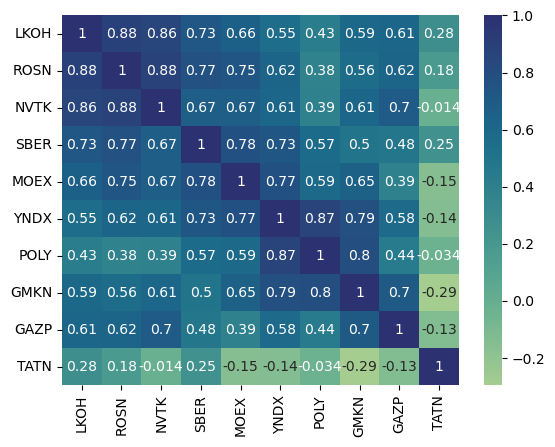

In [448]:
import seaborn as sns

sns.heatmap(tickers_corr, annot=True, cmap='crest')
# as we can see
# the clustered tickers have high correlations

In [774]:
import copy
def calc_variance(cluster, allocations, constrained=False):
    print(f'Process {cluster}')
    if len(cluster) < 2:
        return
    
    V_ts = []
    alpha = []
    
    i = int(len(cluster)/2)
    sub1, sub2 = cluster[:i], cluster[i:]
    
    if len(sub1) > 1:
        V = tickers_cov.loc[sub1, sub1]
        w = np.diag(np.linalg.inv(np.diag(V) * np.eye(*V.shape)) / np.trace(np.linalg.inv(np.diag(V) * np.eye(*V.shape))))
        V_t = w.T @ V @ w
        V_ts.append(V_t)
    
    if len(sub2) > 1:
        V = tickers_corr.loc[sub2, sub2].cov()
        print(f'\n{sub2} V =\n {V}')
        w = np.diag(np.linalg.inv(np.diag(V) * np.eye(*V.shape)) / np.trace(np.linalg.inv(np.diag(V) * np.eye(*V.shape))))
        print(f'w = {w}')
        V_t = w.T @ V @ w
        print(f'V_t = {V_t}')
        V_ts.append(V_t)
        
    if len(V_ts) > 1:
    
        V_ts = np.asarray(V_ts)
        normalizer_V = np.sum(V_ts)

        for i in range(2):
            alpha.append(1 - V_ts[i]/normalizer_V)
        alpha = np.asarray(alpha)

        print(f'Scale by {alpha}')
        
        # enforce alpha with constraints
        lower_bound1 = np.ones(len(sub1)) * 0.05
        upper_bound1 = np.ones(len(sub1)) * 0.33
        
        lower_bound2 = np.ones(len(sub2)) * 0.2
        upper_bound2 = np.ones(len(sub2)) * 0.33
        
        alpha_new = np.zeros(alpha.shape[0])
        alpha_new[0] = max(min(alpha[0], upper_bound1.sum()), lower_bound1.sum())
        alpha_new[1] = max(min(alpha[0], upper_bound2.sum()), lower_bound2.sum())
        alpha_new /= np.abs(alpha_new).sum()
        t_alpha_new = np.zeros_like(alpha_new)

        for t in range(100): # with learning rate
            a = 0.01
            t_alpha_new[0] = (1-a)*alpha_new[0] + abs(1 - alpha_new.sum()) * alpha[0] / alpha.sum() *a
            t_alpha_new[1] = (1-a)*alpha_new[1] + abs(1 - alpha_new.sum()) * alpha[1] / alpha.sum() *a 
            
            alpha_new = copy.deepcopy(t_alpha_new)
                
            # print(f'Scaled alpha = {alpha_new}')
            
        if constrained:
            for i, tick in enumerate(sub1):
                allocations[tick] *= alpha_new[0]
            for i, tick in enumerate(sub2):
                allocations[tick] *= alpha_new[1]
            
        else:
            for tick in sub1:
                allocations[tick] *= alpha[0] * (1 - alpha[1])
            for tick in sub2:
                allocations[tick] *= alpha[1] * (1 - alpha[0])

        calc_variance(sub1, allocations)
        calc_variance(sub2, allocations)
    
    return

In [781]:
allocations = {ticker: 1 for ticker in temp_cluster}
calc_variance(temp_cluster, allocations, constrained=False)

Process ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX', 'YNDX', 'POLY', 'GMKN', 'GAZP', 'TATN')

('YNDX', 'POLY', 'GMKN', 'GAZP', 'TATN') V =
           YNDX      POLY      GMKN      GAZP      TATN
YNDX  0.202550  0.180191  0.215091  0.126943 -0.215567
POLY  0.180191  0.173991  0.189452  0.089614 -0.181755
GMKN  0.215091  0.189452  0.261158  0.175853 -0.264612
GAZP  0.126943  0.089614  0.175853  0.175234 -0.194080
TATN -0.215567 -0.181755 -0.264612 -0.194080  0.273312
w = [0.20675267 0.24068907 0.16035397 0.23898123 0.15322306]
V_t = 0.07074875208461659
Scale by [0.0800885 0.9199115]
Process ('LKOH', 'ROSN', 'NVTK', 'SBER', 'MOEX')

('NVTK', 'SBER', 'MOEX') V =
           NVTK      SBER      MOEX
NVTK  0.035585 -0.023630 -0.023059
SBER -0.023630  0.028129  0.002685
MOEX -0.023059  0.002685  0.027760
w = [0.28193321 0.35666316 0.36140362]
V_t = 0.0012736420300617742
Scale by [0.00135045 0.99864955]
Process ('LKOH', 'ROSN')
Process ('NVTK', 'SBER', 'MOEX')

('SBER', 'MOEX') V =
           SBER 

In [782]:
allocations

{'LKOH': 1.1697530550257357e-08,
 'ROSN': 1.1697530550257357e-08,
 'NVTK': 0.0063968563009931725,
 'SBER': 0.0063968563009931725,
 'MOEX': 0.0063968563009931725,
 'YNDX': 0.0028599998421487533,
 'POLY': 0.0028599998421487533,
 'GMKN': 0.750705327407944,
 'GAZP': 0.750705327407944,
 'TATN': 0.750705327407944}

In [783]:
# recursive division
portfolio = tickers

weights_a = np.asarray([w for k,w in allocations.items()])

w_hierarchy = weights_a
# w_hierarchy = w_hierarchy / np.abs(w_hierarchy).sum() # normalize

# top portfolio
N = weights_a.shape[0]
w_top = np.ones(N) / N

# markowitz
import scipy
def markowitz(w):
    return w.T @ tickers_cov @ w
def constraint1(w):
    return w# - 1e-2
constraints = [{'type': 'ineq', 'fun': constraint1}]
w_markowitz = scipy.optimize.minimize(markowitz, np.ones(N), constraints=constraints).x
w_markowitz = w_markowitz / np.abs(w_markowitz).sum()

# inverse variance portfolio
volatilities = tickers_df[tickers].std()
vols = np.array([vol**(-2) for vol in volatilities])
w_inv_var = vols / sum(1/volatilities**2)

# pnls
returns_ahead_df = tickers_df[tickers].pct_change().shift(-1)

pnls_hierarchy = (w_hierarchy * returns_ahead_df.shift(-1)).sum(axis=1).cumsum()
pnls_top = (w_top * returns_ahead_df.shift(-1)).sum(axis=1).cumsum()
pnls_markowitz = (w_markowitz * returns_ahead_df.shift(-1)).sum(axis=1).cumsum()
pnls_inv_var = (w_inv_var * returns_ahead_df.shift(-1)).sum(axis=1).cumsum()

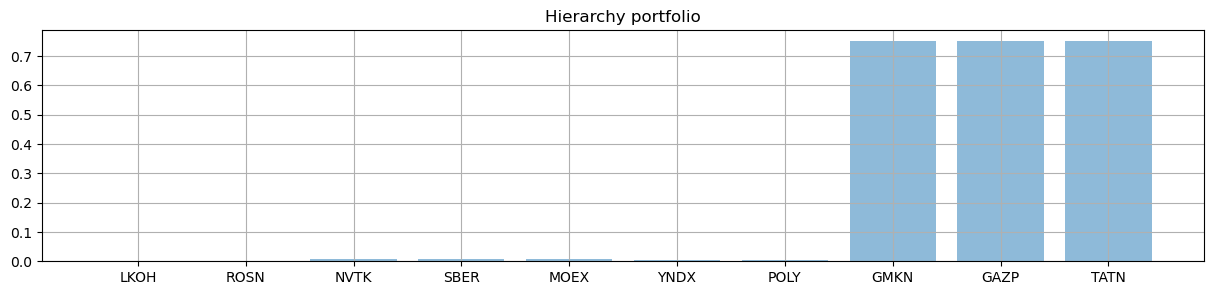

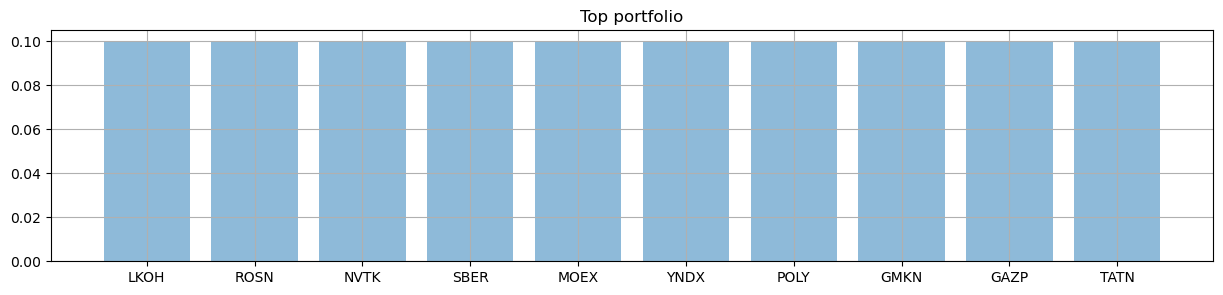

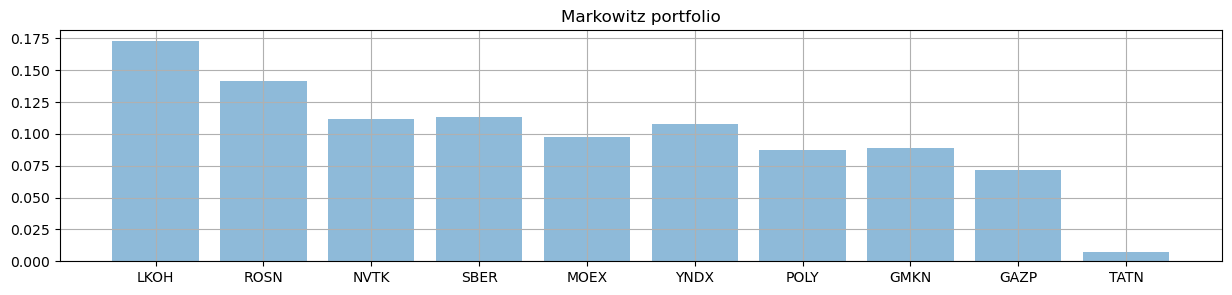

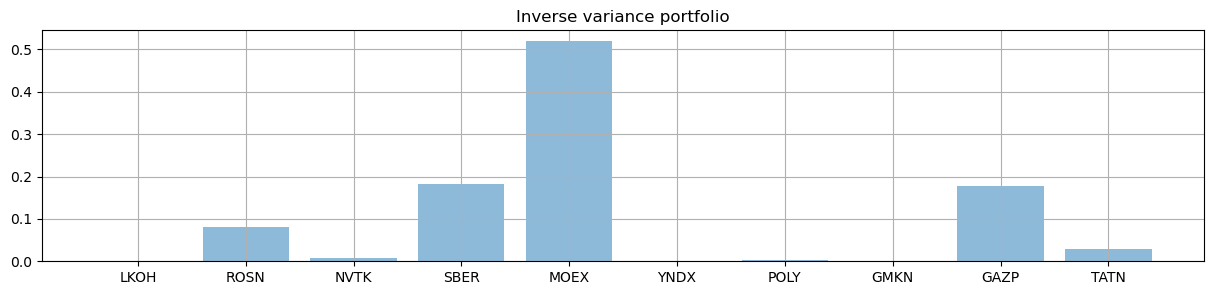

In [784]:
plt.figure(figsize=(15,3))
plt.title('Hierarchy portfolio')
plt.bar(height=w_hierarchy, x=tickers, label='Hierarchy portfolio', alpha=0.5)
plt.grid()
# plt.legend()
plt.show()

plt.figure(figsize=(15,3))
plt.title('Top portfolio')
plt.bar(height=w_top, x=tickers, label='TOP portfolio', alpha=0.5)
plt.grid()
# plt.legend()
plt.show()

plt.figure(figsize=(15,3))
plt.title('Markowitz portfolio')
plt.bar(height=w_markowitz, x=tickers, alpha=0.5)
plt.grid()
# plt.legend()
plt.show()

plt.figure(figsize=(15,3))
plt.title('Inverse variance portfolio')
plt.bar(height=w_inv_var, x=tickers, label='Inverse variance portfolio', alpha=0.5)
plt.grid()
# plt.legend()
plt.show()


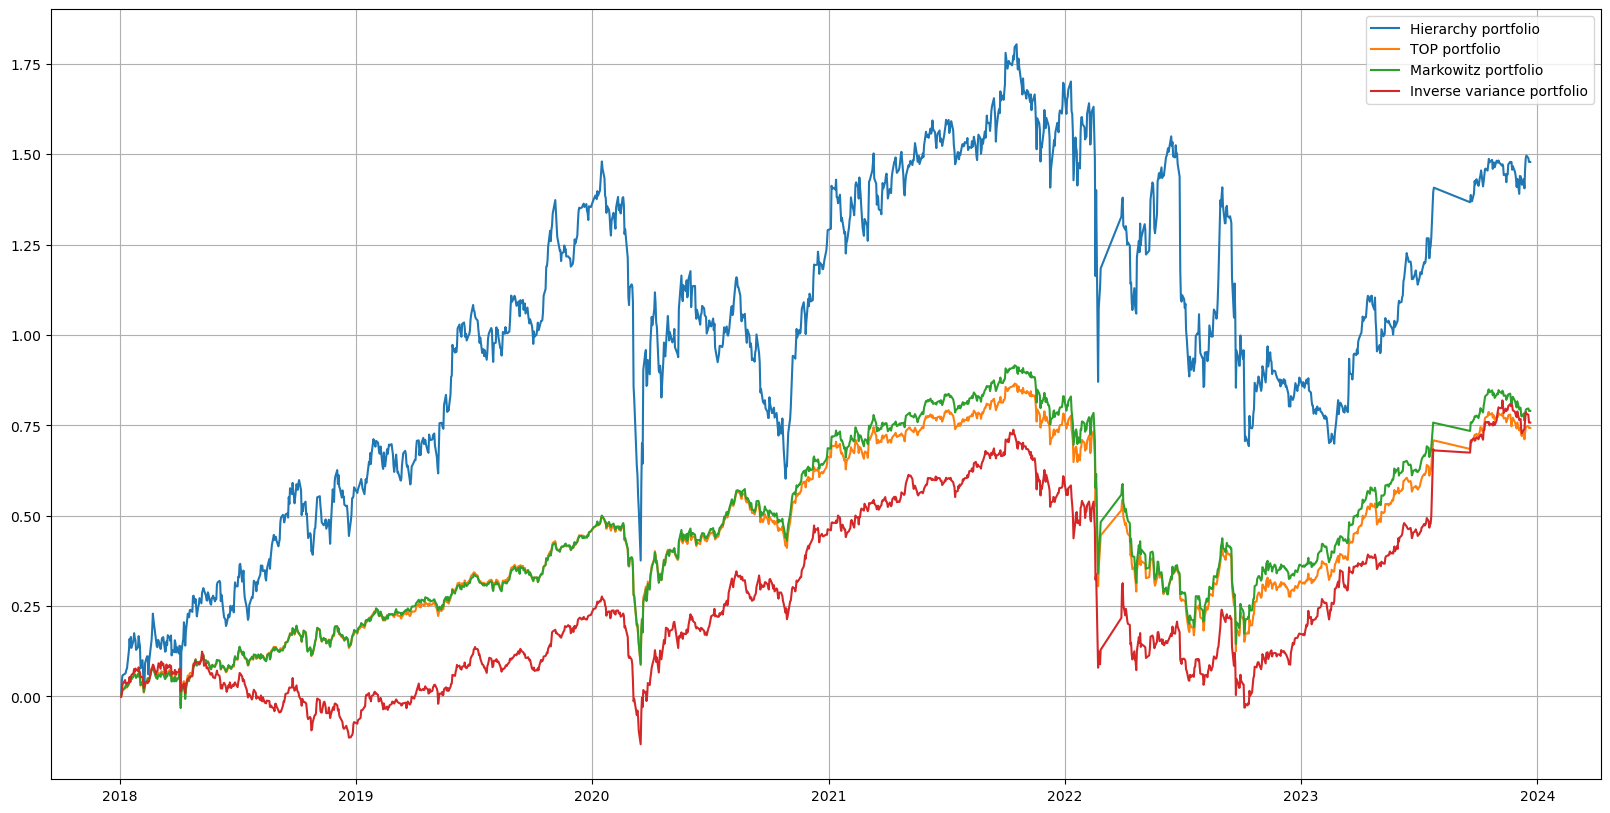

In [785]:
# compare plots
plt.figure(figsize=(20,10))
plt.plot(pnls_hierarchy, label='Hierarchy portfolio')
plt.plot(pnls_top, label='TOP portfolio')
plt.plot(pnls_markowitz, label='Markowitz portfolio')
plt.plot(pnls_inv_var, label='Inverse variance portfolio')
plt.grid()
plt.legend()
plt.show()

In [786]:
# calculate stats
def return_stats(pnls):
    # calc drawdown
    max_val = -float('inf')
    drawdown = 0
    start_date, end_date = None, None
    for date, bar in pnls.items():
        if bar > max_val:
            max_val = bar
            start_date = date
        elif max_val - bar > drawdown:
            drawdown = max_val - bar
            end_date = date
    returns = pnls.diff(1)
    return {'drawdown' : (drawdown, start_date, end_date),
            'volatility': returns.std(),
            'sharpe': returns.mean()/returns.std()/np.sqrt(1/365)}

In [787]:
pnls_list = [pnls_hierarchy, pnls_top, pnls_markowitz, pnls_inv_var]
pnls_names = ['hierarchy', 'TOP', 'markowitz', 'inv_var']
stats_list = []
for pnl in pnls_list:
    stats_list.append(return_stats(pnl))

In [788]:
max_drawdown, max_drd_idx = -float('inf'), None
max_sharpe, max_sharpe_idx = -float('inf'), None
max_vloatility, max_volatility_idx = -float('inf'), None

for i, stat in enumerate(stats_list):
    if stat['drawdown'][0] > max_drawdown:
        max_drawdown = stat['drawdown'][0]
        max_drd_idx = i
    if stat['sharpe'] > max_sharpe:
        max_sharpe = stat['sharpe']
        max_sharpe_idx = i
    if stat['volatility'] > max_vloatility:
        max_vloatility = stat['volatility']
        max_volatility_idx = i

In [789]:
print(f'''
max_drawdown = {max_drawdown}, which belongs to {pnls_names[max_drd_idx]},
max_volatility = {max_vloatility} which belongs to {pnls_names[max_volatility_idx]},
max_sharpe = {max_sharpe}, which belongs to {pnls_names[max_sharpe_idx]},
''')


max_drawdown = 1.1118637938853222, which belongs to hierarchy,
max_volatility = 0.04075197898177218 which belongs to hierarchy,
max_sharpe = 0.6269888543125213, which belongs to markowitz,



Let's note that the hierarchy also has the biggest drawdown since it has the biggest growth and high correlation with other portfolios so it has proportionally bigger drawdonw.